Data preprocessing

In [418]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [419]:
#Import dataset
dataset = pd.read_csv("age_height.csv")

In [420]:
dataset.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [421]:
#matrix of features-independent variable
x = dataset.iloc[:, 0:1].values

In [422]:
y = dataset.iloc[:, -1].values

In [423]:
y.shape

(71,)

In [424]:
#number of rows, number of columns 
y = y.reshape(71,1)

In [425]:
y.shape

(71, 1)

In [426]:
#Featuring scaling
standardscaler_x = StandardScaler()
standardscaler_y = StandardScaler()

In [427]:
x = standardscaler_x.fit_transform(x.reshape(-1,1))
y = standardscaler_y.fit_transform(y)

In [428]:
print(x)

[[-1.70782513]
 [-1.65903012]
 [-1.61023512]
 [-1.56144012]
 [-1.51264511]
 [-1.46385011]
 [-1.41505511]
 [-1.3662601 ]
 [-1.3174651 ]
 [-1.26867009]
 [-1.21987509]
 [-1.17108009]
 [-1.12228508]
 [-1.07349008]
 [-1.02469508]
 [-0.97590007]
 [-0.92710507]
 [-0.87831007]
 [-0.82951506]
 [-0.78072006]
 [-0.73192505]
 [-0.68313005]
 [-0.63433505]
 [-0.58554004]
 [-0.53674504]
 [-0.48795004]
 [-0.43915503]
 [-0.39036003]
 [-0.34156503]
 [-0.29277002]
 [-0.24397502]
 [-0.19518001]
 [-0.14638501]
 [-0.09759001]
 [-0.048795  ]
 [ 0.        ]
 [ 0.048795  ]
 [ 0.09759001]
 [ 0.14638501]
 [ 0.19518001]
 [ 0.24397502]
 [ 0.29277002]
 [ 0.34156503]
 [ 0.39036003]
 [ 0.43915503]
 [ 0.48795004]
 [ 0.53674504]
 [ 0.58554004]
 [ 0.63433505]
 [ 0.68313005]
 [ 0.73192505]
 [ 0.78072006]
 [ 0.82951506]
 [ 0.87831007]
 [ 0.92710507]
 [ 0.97590007]
 [ 1.02469508]
 [ 1.07349008]
 [ 1.12228508]
 [ 1.17108009]
 [ 1.21987509]
 [ 1.26867009]
 [ 1.3174651 ]
 [ 1.3662601 ]
 [ 1.41505511]
 [ 1.46385011]
 [ 1.51264

In [429]:
print(y)

[[-1.10522232]
 [-1.10522232]
 [-1.10522232]
 [-1.05690287]
 [-1.05690287]
 [-1.05690287]
 [-1.00858342]
 [-1.00858342]
 [-1.00858342]
 [-0.96026397]
 [-0.96026397]
 [-0.96026397]
 [-0.91194452]
 [-0.91194452]
 [-0.91194452]
 [-0.86362507]
 [-0.86362507]
 [-0.86362507]
 [-0.81530563]
 [-0.81530563]
 [-0.76698618]
 [-0.76698618]
 [-0.71866673]
 [-0.71866673]
 [-0.67034728]
 [-0.67034728]
 [-0.62202783]
 [-0.62202783]
 [-0.57370838]
 [-0.57370838]
 [-0.52538893]
 [-0.52538893]
 [-0.47706949]
 [-0.42875004]
 [-0.38043059]
 [-0.28379169]
 [-0.23547224]
 [-0.18715279]
 [-0.13883335]
 [-0.0905139 ]
 [-0.04219445]
 [ 0.006125  ]
 [ 0.05444445]
 [ 0.1027639 ]
 [ 0.15108335]
 [ 0.15108335]
 [ 0.1994028 ]
 [ 0.24772224]
 [ 0.29604169]
 [ 0.34436114]
 [ 0.39268059]
 [ 0.44100004]
 [ 0.48931949]
 [ 0.53763894]
 [ 0.58595838]
 [ 0.68259728]
 [ 0.82755563]
 [ 0.92419452]
 [ 1.06915287]
 [ 1.16579177]
 [ 1.31075011]
 [ 1.40738901]
 [ 1.55234736]
 [ 1.64898625]
 [ 1.84226405]
 [ 2.03554184]
 [ 2.08386

Training model

In [430]:
# kernel rbf: it is a gaussian kernel
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

/home/emma/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting the test set result

In [431]:
# this will reutnr the predicted points for the input level
# but the result will be scaled format on which y(dependent)
yPrediction = regressor.predict(standardscaler_x.transform([[40]]))

In [432]:
yPrediction

array([-0.44322788])

In [433]:
yPrediction = standardscaler_y.inverse_transform(yPrediction.reshape(-1,1))

In [434]:
yPrediction

array([[151.70037229]])

Visualising SVR results

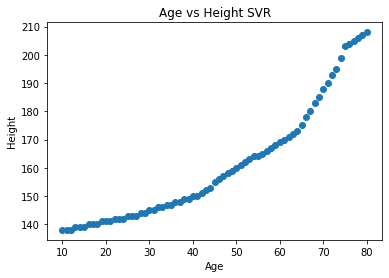

In [438]:
# apply inverse_transform to get the original scale
plt.scatter(standardscaler_x.inverse_transform(x), standardscaler_y.inverse_transform(y)) 

# the predicted points x
#plt.plot(standardscaler_x.inverse_transform(x), standardscaler_y.inverse_transform(regressor.predict(x)), color='red')  # plotting the regression line

plt.title('Age vs Height SVR')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()